<a href="https://colab.research.google.com/github/Bengyjr/Bengyhse/blob/main/Consumer_Brands_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [210]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime

import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')

In [211]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'AMZN', 'TSLA',
             'META', 'NFLX', 'SBUX', 'DIS', 'KO']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
  globals()[stock] = yf.download(stock, start, end)

company_list = [AAPL, GOOG, AMZN, TSLA,
             META, NFLX, SBUX, DIS, KO]

company_name = ['AAPL', 'GOOG', 'AMZN', 'TSLA',
             'META', 'NFLX', 'SBUX', 'DIS', 'KO']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [212]:
for company, com_name in zip(company_list, company_name):
  company['company_name'] = com_name

df = pd.concat(company_list, axis=0)
df.head()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-06-30,137.250000,138.369995,133.770004,136.720001,135.908463,98964500,AAPL
2022-07-01,136.039993,139.039993,135.660004,138.929993,138.105331,71051600,AAPL
2022-07-05,137.770004,141.610001,136.929993,141.559998,140.719727,73353800,AAPL
2022-07-06,141.350006,144.119995,141.080002,142.919998,142.071655,74064300,AAPL
2022-07-07,143.289993,146.550003,143.279999,146.350006,145.481293,66253700,AAPL


In [213]:
df.shape

(2268, 7)

In [214]:
# Drop company name column

AAPL.drop('company_name', axis=1, inplace=True)
GOOG.drop('company_name', axis=1, inplace=True)
AMZN.drop('company_name', axis=1, inplace=True)
TSLA.drop('company_name', axis=1, inplace=True)
META.drop('company_name', axis=1, inplace=True)
NFLX.drop('company_name', axis=1, inplace=True)
SBUX.drop('company_name', axis=1, inplace=True)
DIS.drop('company_name', axis=1, inplace=True)
KO.drop('company_name', axis=1, inplace=True)

In [215]:
KO.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-30,62.320000,63.110001,62.160000,62.910000,61.077610,15514200
2022-07-01,63.119999,64.449997,62.820000,64.379997,62.504791,15143200
2022-07-05,64.180000,64.180000,62.419998,63.279999,61.436832,15921200
2022-07-06,63.599998,64.089996,63.189999,63.410000,61.563046,13450500
2022-07-07,63.259998,63.580002,62.700001,62.910000,61.077610,14828400


In [216]:
# Due to the timezone issues, we extract and calculate appropriate stock market data for analysis
# Indicepanel is the DataFrame of our trading model
indicepanel=pd.DataFrame(index=AAPL.index)


indicepanel['AAPL']=AAPL['Open'].shift(-1)-AAPL['Open']
indicepanel['AAPL_lag1']=indicepanel['AAPL'].shift(1)

indicepanel['GOOG']=GOOG["Open"]-GOOG['Open'].shift(1)
indicepanel['AMZN']=AMZN['Open']-AMZN['Open'].shift(1)
indicepanel['TSLA']=TSLA['Open']-TSLA['Open'].shift(1)
indicepanel['META']=META["Open"]-META['Open'].shift(1)
indicepanel['NFLX']=NFLX['Open']-NFLX['Open'].shift(1)
indicepanel['SBUX']=SBUX['Open']-SBUX['Open'].shift(1)
indicepanel['DIS']=DIS["Open"]-DIS['Open'].shift(1)
indicepanel['KO']=KO['Open']-KO['Open'].shift(1)

indicepanel['Price']=AAPL['Open']

In [217]:
indicepanel.head()

,AAPL,AAPL_lag1,GOOG,AMZN,TSLA,META,NFLX,SBUX,DIS,KO,Price
Date,,,,,,,,,,,
2022-06-30,-1.210007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137.250000
2022-07-01,1.730011,-1.210007,-2.162498,-1.820000,2.490005,-1.839996,-0.580002,0.720001,-0.180000,0.799999,136.039993
2022-07-05,3.580002,1.730011,-0.822495,1.309998,-4.000000,-2.169998,-0.210007,1.289993,0.020004,1.060001,137.770004
2022-07-06,1.939987,3.580002,6.577499,5.610001,7.779999,10.059998,8.919998,1.810005,3.269997,-0.580002,141.350006
2022-07-07,1.970001,1.939987,1.916000,0.639999,3.139999,1.250000,-0.929993,-1.020004,-0.629997,-0.340000,143.289993


In [218]:
# Lets check whether do we have NaN values in indicepanel
indicepanel.isnull().sum()

AAPL         1
AAPL_lag1    1
GOOG         1
AMZN         1
TSLA         1
META         1
NFLX         1
SBUX         1
DIS          1
KO           1
Price        0
dtype: int64

In [219]:
# We can use method 'fillna()' from dataframe to forward filling the Nan values
# Then we can drop the reminding Nan values
indicepanel = indicepanel.fillna(method='ffill')
indicepanel = indicepanel.dropna()

In [220]:
# Lets check whether do we have Nan values in indicepanel now
indicepanel.isnull().sum()

AAPL         0
AAPL_lag1    0
GOOG         0
AMZN         0
TSLA         0
META         0
NFLX         0
SBUX         0
DIS          0
KO           0
Price        0
dtype: int64

In [221]:
indicepanel.shape

(251, 11)

In [222]:
#split the data into (1)train set and (2)test set

Train = indicepanel.iloc[-201:-50, :]
Test = indicepanel.iloc[-50:, :]
print(Train.shape, Test.shape)

(151, 11) (50, 11)


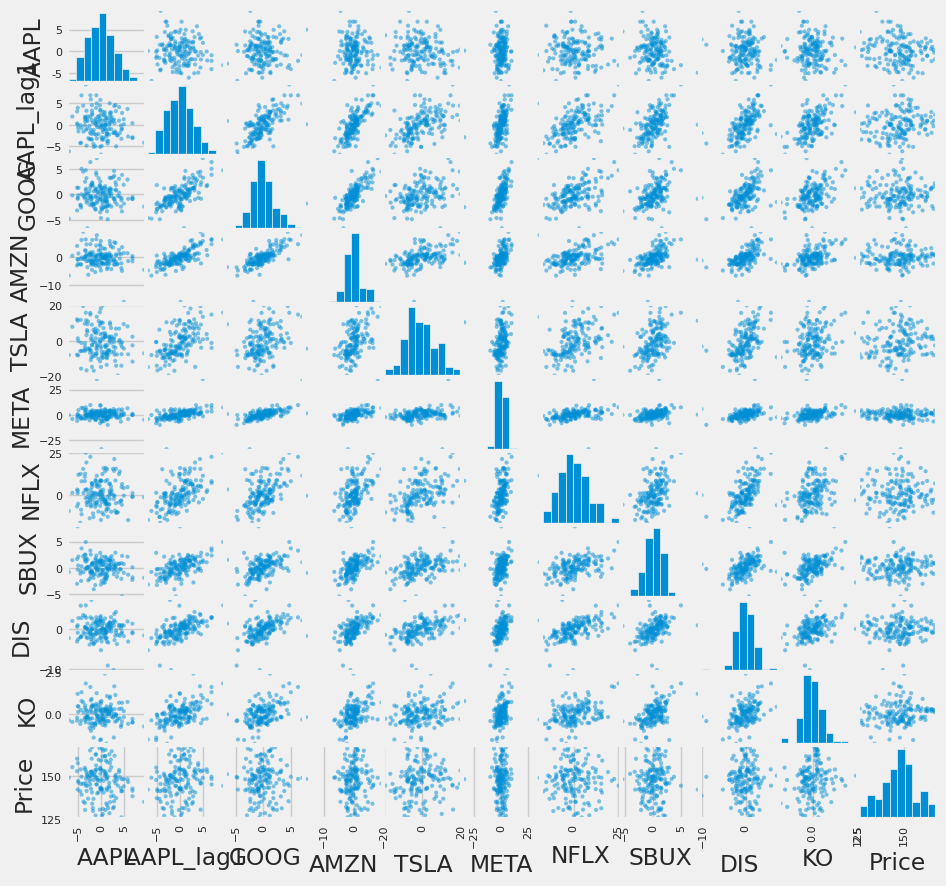

In [223]:
# Generate scatter matrix among all stock markets (and the price of SPY) to observe the association

from pandas.plotting import scatter_matrix
sm = scatter_matrix(Train, figsize=(10, 10))

In [224]:
# Find the indice with largest correlation
corr_array = Train.iloc[:, :-1].corr()['AAPL']
print(corr_array)

AAPL         1.000000
AAPL_lag1   -0.095290
GOOG        -0.004729
AMZN        -0.107754
TSLA        -0.150098
META        -0.003485
NFLX        -0.036207
SBUX        -0.181361
DIS         -0.072719
KO          -0.077332
Name: AAPL, dtype: float64


In [225]:
formula = 'AAPL~AAPL_lag1+GOOG+AMZN+TSLA+META+NFLX+SBUX+DIS+KO'
lm = smf.ols(formula=formula, data=Train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   AAPL   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.9725
Date:                Fri, 30 Jun 2023   Prob (F-statistic):              0.465
Time:                        16:26:29   Log-Likelihood:                -371.09
No. Observations:                 151   AIC:                             762.2
Df Residuals:                     141   BIC:                             792.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0228      0.246      0.093      0.926      -0.463       0.508
AAPL_lag1     -0.0412      0.148     -0.278      0.782      -0.334       0.252
GOOG           0.2523      0.204      1.235      0.219      -0.151       0.656
AMZN          -0.1154      0.131     -0.878      0.382      -0.375       0.145
TSLA          -0.0344      0.039     -0.887      0.377      -0.111       0.042
META           0.0041      0.059      0.070      0.944      -0.112       0.120
NFLX           0.0224      0.040      0.564      0.574      -0.056       0.101
SBUX          -0.2797      0.179     -1.563      0.120      -0.633       0.074
DIS            0.0066      0.141      0.047      0.963      -0.272       0.285
KO            -0.0552      0.486     -0.114      0.910      -1.015       0.905
==============================================================================
Omnibus:                        0.973   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.615   Jarque-Bera (JB):                1.031
Skew:                           0.187   Prob(JB):                        0.597
Kurtosis:                       2.843   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [226]:
Train['PredictedY'] = lm.predict(Train)
Test['PredictedY'] = lm.predict(Test)

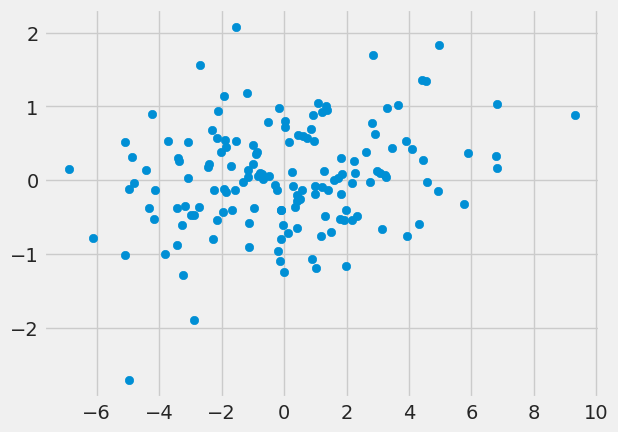

In [227]:
plt.scatter(Train['AAPL'], Train['PredictedY'])

In [228]:
# RMSE - Root Mean Squared Error, Adjusted R^2
def adjustedMetric(data, model, model_k, yname):
    data['yhat'] = model.predict(data)
    SST = ((data[yname] - data[yname].mean())**2).sum()
    SSR = ((data['yhat'] - data[yname].mean())**2).sum()
    SSE = ((data[yname] - data['yhat'])**2).sum()
    r2 = SSR/SST
    adjustR2 = 1 - (1-r2)*(data.shape[0] - 1)/(data.shape[0] -model_k -1)
    RMSE = (SSE/(data.shape[0] -model_k -1))**0.5
    return adjustR2, RMSE

In [229]:
def assessTable(test, train, model, model_k, yname):
    r2test, RMSEtest = adjustedMetric(test, model, model_k, yname)
    r2train, RMSEtrain = adjustedMetric(train, model, model_k, yname)
    assessment = pd.DataFrame(index=['R2', 'RMSE'], columns=['Train', 'Test'])
    assessment['Train'] = [r2train, RMSEtrain]
    assessment['Test'] = [r2test, RMSEtest]
    return assessment

In [230]:
# Get the assement table fo our model
assessTable(Test, Train, lm, 9, 'AAPL')

,Train,Test
R2,-0.001653,-0.015088
RMSE,2.923716,2.446516
